Nome: Adriano Ulrich do Prado Wiedmann

---

Matrícula: 202014824

In [2]:
#allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import sys

!cat '/content/drive/MyDrive/DP5/utils.py'
sys.path.append('/content/drive/MyDrive/DP5')

import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 24
NumFcMax = 10
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[10, -10],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
              

In [27]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# Pytorch
import torch

# modules to dataset
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# modules to adequate the NN
from torch import nn
from torch import optim

# Measuring execution time
import time


import torch.nn.functional as F

In [5]:
def testar_gpu():
	train_on_gpu = torch.cuda.is_available() #Observa se a GPU está disponivel
	if train_on_gpu: #Se sim
		device = torch.device('cuda') #Seleciona o device como GPU
		print("Treinando na GPU") #E manda a mensagem
	else: #Se não
		device = torch.device('cpu') #Seleciona o device como cpu
		print("GPU indisponível, treinando na CPU") #E avisa que a GPU não esta disponível
	return device

device = testar_gpu()

Treinando na GPU


In [6]:
pip install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-f_g80l55
  Running command git clone --filter=blob:none --quiet https://github.com/fastai/fastai.git /tmp/pip-req-build-f_g80l55
  Resolved https://github.com/fastai/fastai.git to commit 785ec908c7f75a272c718dd0df53822bdf5e9e0e
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-m

In [7]:
import fastai.vision.all as fst

In [8]:
path = fst.untar_data(fst.URLs.PETS)/'images'

In [9]:
# Get list of files
files = list(fst.get_image_files(path))
files[:10]

[Path('/root/.fastai/data/oxford-iiit-pet/images/keeshond_35.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_197.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_56.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_27.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_175.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_133.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_21.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_64.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_167.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_115.jpg')]

In [10]:
print('Number of images:', len(files))

Number of images: 7390


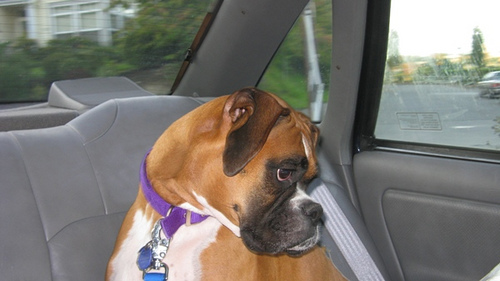

In [11]:
from random import randint
fst.PILImage.create(files[randint(0,7390)])

In [12]:
def is_cat(x): return x[0].isupper()

In [13]:
# Load data into fastai
dls = fst.ImageDataLoaders.from_name_func(   # Structure of dataset
          path=path,                         # Working directory
          fnames= files,                     # List of files
          valid_pct=0.2,                     # Size of validation set
          seed=42,                           # Random number seed
          label_func=is_cat,                 # Helper function for labels
          item_tfms= fst.Resize(224))        # Data transformations

In [14]:
# Create a fastai "learner"
learn = fst.cnn_learner(     # Helper function to create learner for CNNs
    dls=dls,                 # Previously created dataloaders
    arch=fst.resnet34)       # Pretrained model architecture

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 131MB/s]


In [15]:
epochs = 3

# Train the model (fine-tuning)
learn.fine_tune(3)

epoch,train_loss,valid_loss,time
0,0.171288,0.023236,00:48


epoch,train_loss,valid_loss,time
0,0.058227,0.087756,00:52
1,0.044333,0.016381,00:52
2,0.022599,0.019728,00:53


In [16]:
#Test with cat
from ipywidgets import widgets
uploader1 = widgets.FileUpload()
print('Faça o upload de uma imagem que contenha um gato')
uploader1

Faça o upload de uma imagem que contenha um gato


FileUpload(value={}, description='Upload')

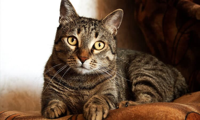

In [17]:
img1 = fst.PILImage.create(uploader1.data[0])
img1.to_thumb(200)

In [18]:
is_cat,_,probs = learn.predict(img1)
print(f"Isso é um gato?: {is_cat}.")
print(f"Probabilidade de ser um gato: {100* probs[1].item():.6f}%")

Isso é um gato?: True.
Probabilidade de ser um gato: 100.000000%


In [19]:
uploader2 = widgets.FileUpload()
print('Faça o upload de uma imagem que contenha um cão')
uploader2

Faça o upload de uma imagem que contenha um cão


FileUpload(value={}, description='Upload')

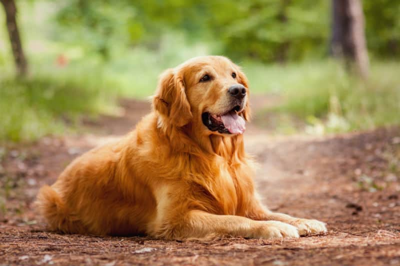

In [20]:
img2 = fst.PILImage.create(uploader2.data[0])
img2.to_thumb(400)

In [21]:
is_cat,_,probs = learn.predict(img2)
print(f"Isso é um gato?: {is_cat}.")
print(f"Probabilidade de ser um gato: {100* probs[1].item():.6f}%")

Isso é um gato?: False.
Probabilidade de ser um gato: 0.005117%


In [22]:
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
data = ImageFolder('/content/drive/MyDrive/DP5/Utilidades-DP5/Data/Duas', transform=transform)

In [23]:
print('Total de imagens no dataset:', len(data))
percentage = 75
n_treino = round(len(data)* (percentage/100))
n_teste = round(len(data)* (100 - percentage)/(2*100))
n_valid = len(data) - n_treino - n_teste

print('nº de imagens para treino: {:}'.format(n_treino) +'; nº de imagens para teste: {:}'.format(n_teste) +'; nº de imagens para validação: {:}'.format(n_valid) + '.')
data_train, data_test, data_valid = random_split(data, [n_treino, n_teste, n_valid], generator=torch.Generator().manual_seed(42))

batch_size = 20
loader_train, loader_test, loader_valid = DataLoader(data_train, batch_size=batch_size), DataLoader(data_test, batch_size=1), DataLoader(data_valid, batch_size=1)

Total de imagens no dataset: 407
nº de imagens para treino: 305; nº de imagens para teste: 51; nº de imagens para validação: 51.


In [60]:
class NN_CNN(torch.nn.Module):
	def __init__(self, altura_imagem, largura_imagem, n_layer=3):
		super(NN_CNN, self).__init__()
		self.kernel_size_conv = 4
		self.stride_conv = 2
		self.padding_conv = 1
		self.dilation_conv = 1

		self.kernel_size_pool = 2
		self.stride_pool = 2
		self.padding_pool = 1
		self.dilation_pool = 1

		self.altura_imagem = altura_imagem
		self.largura_imagem = largura_imagem

		self.layer1 = torch.nn.Sequential(
      torch.nn.Conv2d(
          in_channels=3,
          out_channels=8,
          kernel_size=self.kernel_size_conv,
          stride=self.stride_conv,
          padding=self.padding_conv,
          dilation=self.dilation_conv),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(
              kernel_size=self.kernel_size_pool,
              stride=self.stride_pool,
              padding=self.padding_pool,
              dilation=self.dilation_pool)
          )


		"""
    Estruture a arquitetura da rede convolucional, tomando por base a definição
		da primeira camada, que foi fornecida acima. A rede criada deve ter a
		mesma arquitetura da rede solicitada para que seja considerada correta.

    Instruções
    ------------
    Siga o exemplo da implementação da primeira camada para implementar as
		demais. Atente-se à compatibilidade entre camadas vizinhas, tal que o
		número de canais de saída da anterior seja compatível com o número de
		canais de entrada da seguinte. Você deve ter por objetivo a arquitetura
		exigida, sendo ela a única válida para pontuar na questão.

		Nota
		------------
		Você é livre para modificar os parâmetros da rede (Convolução, Função
		de Ativação e Pooling) desde que implemente a arquitetura pedida. No
		entanto, recomendamos que utilize os mesmos parâmetros definidos para a
		primeira camada, por simplicidade.

    """

		self.layer2 = 0
		self.layer3 = 0


#======================== YOUR CODE HERE ==========================

		self.layer2 = torch.nn.Sequential(
      torch.nn.Conv2d(
          in_channels=8,
          out_channels=16,
          kernel_size=self.kernel_size_conv,
          stride=self.stride_conv,
          padding=self.padding_conv,
          dilation=self.dilation_conv),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(
              kernel_size=self.kernel_size_pool,
              stride=self.stride_pool,
              padding=self.padding_pool,
              dilation=self.dilation_pool)
            )

		self.layer3 = torch.nn.Sequential(
      torch.nn.Conv2d(
          in_channels=16,
          out_channels=32,
          kernel_size=self.kernel_size_conv,
          stride=self.stride_conv,
          padding=self.padding_conv,
          dilation=self.dilation_conv),
          torch.nn.ReLU(),
          torch.nn.MaxPool2d(
              kernel_size=self.kernel_size_pool,
              stride=self.stride_pool,
              padding=self.padding_pool,
              dilation=self.dilation_pool)
            )

    #=================================================================


		self.dicio = {}
		self.dicio[0] = self.layer1
		self.dicio[1] = self.layer2
		self.dicio[2] = self.layer3

		self.size_list = [(altura_imagem, largura_imagem)]
		self.num_list, self.patch_size_list = [], []
		altura, largura = altura_imagem, largura_imagem
		for n in range(n_layer):
			self.conv_altura = 1 + (altura + 2*self.padding_conv - self.dilation_conv*(self.kernel_size_conv - 1) - 1)//self.stride_conv
			self.conv_largura = 1 + (largura + 2*self.padding_conv - self.dilation_conv*(self.kernel_size_conv - 1) - 1)//self.stride_conv
			altura = 1 + (self.conv_altura + 2*self.padding_pool - self.dilation_pool*(self.kernel_size_pool - 1) - 1)//self.stride_pool
			largura = 1 + (self.conv_largura + 2*self.padding_pool - self.dilation_pool*(self.kernel_size_pool - 1) - 1)//self.stride_pool

			self.size_list.append((self.conv_largura, self.conv_altura))
			self.num_list.append(self.dicio[n][0].in_channels)
			self.size_list.append((altura, largura))
			self.num_list.append(self.dicio[n][0].out_channels)
			self.patch_size_list.append((self.kernel_size_conv,self.kernel_size_conv))
			self.patch_size_list.append((self.kernel_size_pool, self.kernel_size_pool))


		self.num_list.append(self.num_list[-1])

		self.fc1 = torch.nn.Linear(altura * largura * self.num_list[-1], 128)
		self.fc2 = torch.nn.Linear(128, 16)
		self.fc3 = torch.nn.Linear(16, 2)

		self.num_fc_list = []
		self.num_fc_list.append(self.fc1.in_features)
		self.num_fc_list.append(self.fc2.in_features)
		self.num_fc_list.append(self.fc3.in_features)
		self.num_fc_list.append(self.fc3.out_features)

/content/drive/MyDrive/DP5/utils.py:213: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


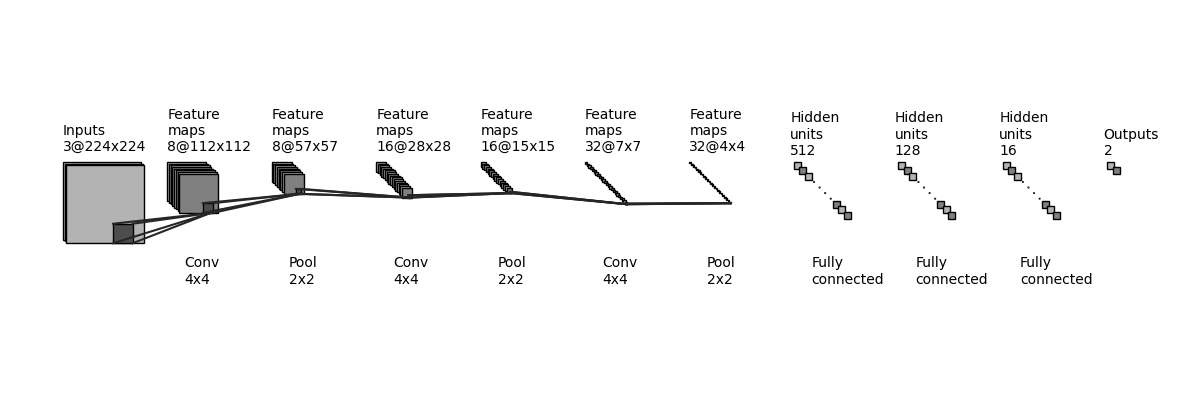

NN_CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=2, bias=True)
)

In [61]:
model = NN_CNN(224,224)
utils.cria_imagem(model)
model

In [87]:
def forward(self,x):
    """
    Implemente a propagação direta na rede neural para que, dado um conjunto de
    dados de entrada "x", o modelo possa prever a probabilidade de pertencer a
    cada uma das classes de saída "^y".

    Parâmetros
    ----------
    self : class_like
      Class que contém os parâmetros da rede.

    x: array_like
        Dataset de entrada. Um vetor com shape (1 x 224*224).

    Retorna
    --------
    out : array_like
        Saída da rede. Vetor com as probabilidades da entrada pertencer a cada
        uma das classes.

    Instruções
    ------------
    Propague os dados de entrada camada a camada, até a camada de saída.
    Atente-se à arquitetura da rede.

    """
    out = 0
    #======================== YOUR CODE HERE ==========================

    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)

    out = out.reshape(out.size(0), -1)

    out = torch.relu(self.fc1(out))
    out = torch.relu(self.fc2(out))
    out = self.fc3(out)
    #==================================================================

    return out

In [88]:
model = NN_CNN(altura_imagem=224,largura_imagem=224).to(device)

import types
model.forward = types.MethodType(forward,model)

In [90]:
epochs = 30 #default = 30
lr = 0.0025 #default = 0.0025

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

list_train_loss = []
list_test_loss = []
list_acc = []
for epoch in range(1, epochs+1):
	model.train()
	for imagem_treino,label_treino in loader_train:
		imagem_treino, label_treino = imagem_treino.float().to(device), label_treino.to(device)
		outputs = model(imagem_treino)
		outputs = (torch.log_softmax(outputs,dim=1))
		loss = criterion(outputs, label_treino.float().long())

		optimizer.zero_grad() #Zera o gradiente para que ele não seja constantemente acumulado na backpropragation que vem a seguir
		loss.backward() #Realiza a backpropragation
		optimizer.step() #realiza mais um passo dentro do gradiente
	list_train_loss.append(loss.item()) #Guarda o valor da função de perda

	correct = 0
	total = 0
	model.eval()
	for imagem_teste, label_teste in loader_test:
		imagem_teste, label_teste = imagem_teste.float().to(device), label_teste.to(device)
		outputs_test = model(imagem_teste)
		outputs_test = (torch.log_softmax(outputs_test,dim=1))
		_,previsao = torch.max(outputs_test, dim = 1)
		loss_test = criterion(outputs_test, label_teste.long())
		total = total + 1 #Adiciona +1 na variável que guarda o total de previsões feitas
		if previsao == label_teste:
			correct = correct + 1 #Soma +1 na variável que mede quantas previsões dessa categoria (erro absoluto de 2 graus) estão certas
	list_test_loss.append(loss_test.item())

	acc = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem
	list_acc.append(acc) #Adiciona essa acurácia a sua lista


	print('epoch:', epoch ,' loss: {:.4f}'.format(loss.item()), ' Accuracy: {:.2f}'.format(acc)) #Printa o valor da função de erro, o sMAPE e a acurácia a cada época


epoch: 1  loss: 0.0024  Accuracy: 72.55
epoch: 2  loss: 0.0055  Accuracy: 72.55
epoch: 3  loss: 0.0041  Accuracy: 78.43
epoch: 4  loss: 0.0124  Accuracy: 78.43
epoch: 5  loss: 0.0010  Accuracy: 84.31
epoch: 6  loss: 0.0001  Accuracy: 80.39
epoch: 7  loss: 0.0000  Accuracy: 80.39
epoch: 8  loss: 0.0000  Accuracy: 80.39
epoch: 9  loss: 0.0000  Accuracy: 80.39
epoch: 10  loss: 0.0000  Accuracy: 80.39
epoch: 11  loss: 0.0000  Accuracy: 82.35
epoch: 12  loss: 0.0000  Accuracy: 82.35
epoch: 13  loss: 0.0000  Accuracy: 82.35
epoch: 14  loss: 0.0000  Accuracy: 82.35
epoch: 15  loss: 0.0000  Accuracy: 80.39
epoch: 16  loss: 0.0000  Accuracy: 82.35
epoch: 17  loss: 0.0000  Accuracy: 80.39
epoch: 18  loss: 0.0000  Accuracy: 82.35
epoch: 19  loss: 0.0000  Accuracy: 80.39
epoch: 20  loss: 0.0000  Accuracy: 80.39
epoch: 21  loss: 0.0000  Accuracy: 80.39
epoch: 22  loss: 0.0000  Accuracy: 82.35
epoch: 23  loss: 0.0000  Accuracy: 80.39
epoch: 24  loss: 0.0000  Accuracy: 80.39
epoch: 25  loss: 0.0000  

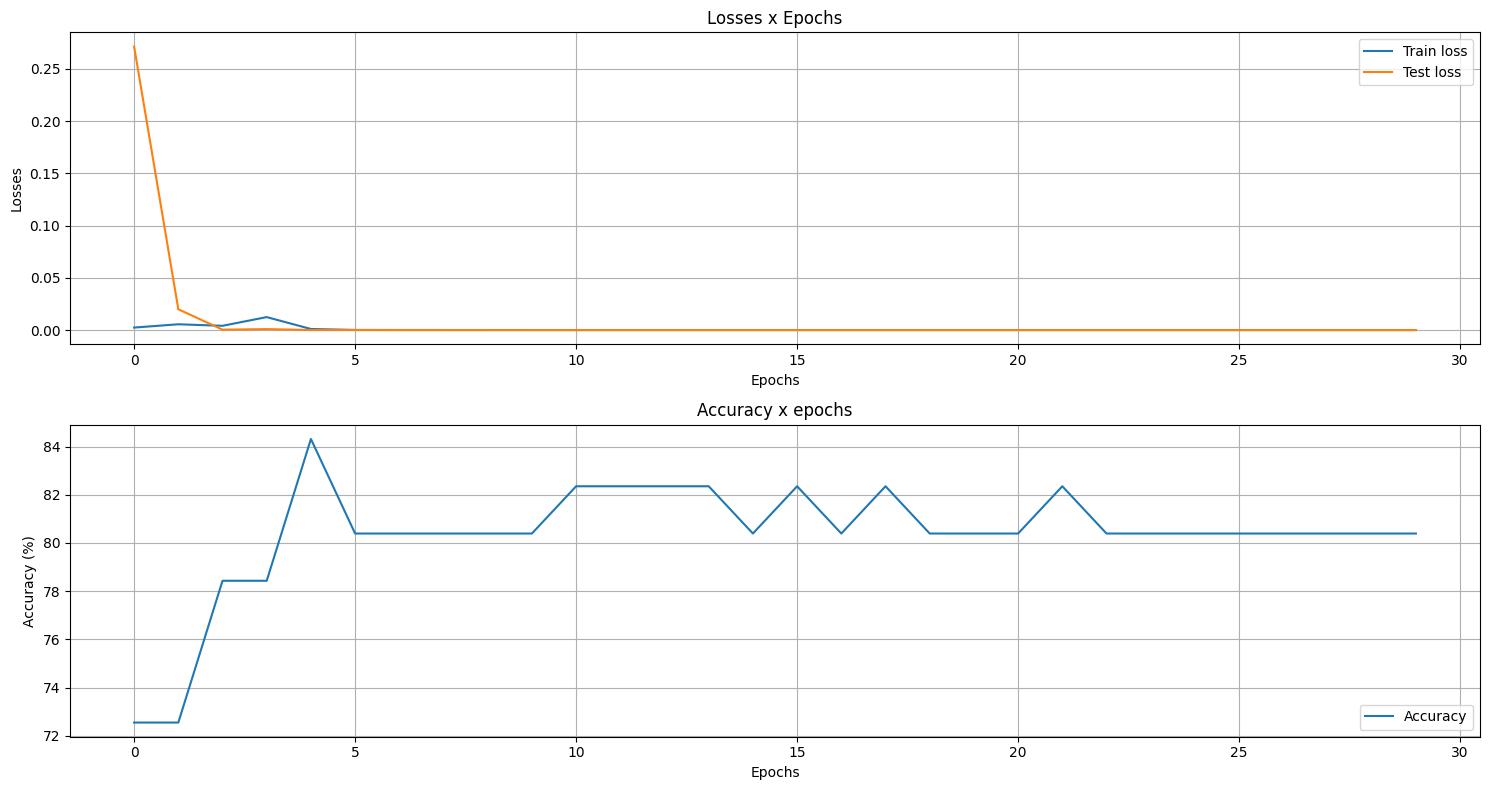

In [91]:
fig, axs = pyplot.subplots(2,figsize=(15,8))
axs[0].plot(list_train_loss,label="Train loss") #Plota o erro de treino X epocas
axs[0].plot(list_test_loss, label="Test loss") #Plota o erro de teste x epocas
axs[0].set_title('Losses x Epochs') #Define o título
axs[0].set(xlabel='Epochs') #Define o nome do eixo x
axs[0].set(ylabel='Losses') #Define o nome do eixo y
axs[0].legend() #Mostra a legenda
axs[0].grid(True) #Mostra a grade


axs[1].plot(list_acc, label='Accuracy') #Plota a acuracia para erro x epocas
axs[1].set_title('Accuracy x epochs') #Define o título
axs[1].set(xlabel='Epochs') #Define o nome do eixo x
axs[1].set(ylabel='Accuracy (%)') #Define o nome do eixo y
axs[1].legend(loc='lower right') #Mostra a legenda
axs[1].grid(True) #Mostra a grade

pyplot.tight_layout()


In [92]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [93]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [94]:
# Freeze our model parameters
for param in model.parameters():
  param.requires_grad = False

# Change the architecture of the classifier portion of the CNN
classifier = nn.Sequential(nn.Linear(512,128),
                           nn.ReLU(),
                           nn.Dropout(p=0.2),
                           nn.Linear(128,2),
                           nn.LogSoftmax(dim=1))

model.fc = classifier

In [95]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [96]:
epochs = 5
lr = 0.001

criterion = nn.NLLLoss()

optimizer = torch.optim.AdamW(model.fc.parameters(), lr=lr)

list_train_loss = []
list_test_loss = []
list_acc = []

model = model.to(device)

In [41]:
?torch.optim.AdamW

In [97]:
START = time.time()

for epoch in range(1, epochs+1):
	start = time.time()

	# Etapa de Treino
	model.train()
	loss_train = 0

	for imagem_treino,label_treino in loader_train:

		loss = 0

		imagem_treino, label_treino = imagem_treino.float().to(device), label_treino.to(device)
		outputs = model(imagem_treino)
		loss = criterion(outputs, label_treino.float().long())

		optimizer.zero_grad() #Zera o gradiente para que ele não seja constantemente acumulado na backpropragation que vem a seguir
		loss.backward() #Realiza a backpropragation
		optimizer.step() #realiza mais um passo dentro do gradiente
		loss_train += loss

	loss_train = loss_train/len(loader_train)
	list_train_loss.append(loss_train.item()) #Guarda o valor da função de perda

	# Etapa de Teste
	model.eval()
	correct = 0
	total = 0
	loss_test = 0

	with torch.no_grad():
		for imagem_teste, label_teste in loader_test:

			imagem_teste, label_teste = imagem_teste.float().to(device), label_teste.to(device)
			outputs_test = model(imagem_teste)

			_,previsao = torch.max(outputs_test, dim = 1)
			loss_test += criterion(outputs_test, label_teste.long())
			total = total + 1 #Adiciona +1 na variável que guarda o total de previsões feitas

			if previsao == label_teste:
				correct = correct + 1 #Soma +1 na variável que mede quantas previsões dessa categoria (erro absoluto de 2 graus) estão certas

		loss_test = loss_test/len(loader_test)
		list_test_loss.append(loss_test.item())

	acc = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem
	list_acc.append(acc) #Adiciona essa acurácia a sua lista

	end = time.time()
	Time = end - start

	if epoch < 10:
		print('Epoch: ', epoch ,' loss: {:.4f}'.format(loss_test.item()), ' Accuracy: {:.2f}'.format(acc), ' Time spent this epoch: {:.2f}'.format(Time), 'seconds.')
	else:
		print('Epoch:', epoch ,' loss: {:.4f}'.format(loss_test.item()), ' Accuracy: {:.2f}'.format(acc), ' Time spent this epoch: {:.2f}'.format(Time), 'seconds.')

END = time.time()

print()
TIME = END - START
print('\n Time spent during training: {:.2f}'.format(TIME), 'seconds')

Epoch:  1  loss: 0.0840  Accuracy: 100.00  Time spent this epoch: 3.57 seconds.
Epoch:  2  loss: 0.0278  Accuracy: 98.04  Time spent this epoch: 2.82 seconds.
Epoch:  3  loss: 0.0123  Accuracy: 100.00  Time spent this epoch: 2.77 seconds.
Epoch:  4  loss: 0.0039  Accuracy: 100.00  Time spent this epoch: 2.81 seconds.
Epoch:  5  loss: 0.0036  Accuracy: 100.00  Time spent this epoch: 3.41 seconds.


 Time spent during training: 15.38 seconds


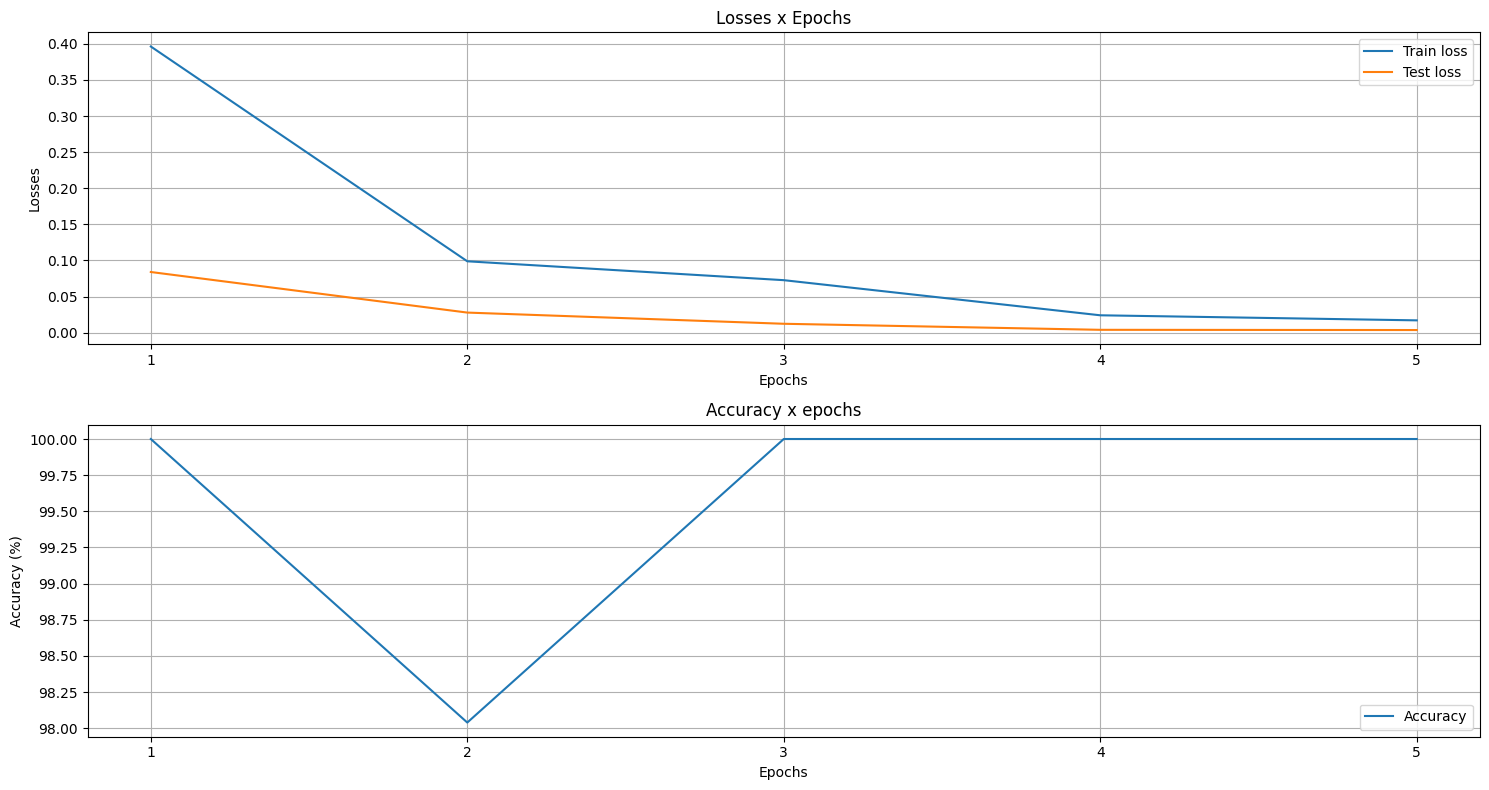

In [98]:
fig, axs = pyplot.subplots(2, figsize=(15,8))
axs[0].plot(range(1, epochs+1,1), list_train_loss[:epochs],label="Train loss") #Plota o erro de treino X epocas
axs[0].plot(range(1, epochs+1,1), list_test_loss, label="Test loss") #Plota o erro de teste x epocas
axs[0].set(xticks=range(1, epochs+1,1))
axs[0].set_title('Losses x Epochs') #Define o título
axs[0].set(xlabel='Epochs') #Define o nome do eixo x
axs[0].set(ylabel='Losses') #Define o nome do eixo y
axs[0].legend() #Mostra a legenda
axs[0].grid(True) #Mostra a grade


axs[1].plot(range(1, epochs+1,1), list_acc, label='Accuracy') #Plota a acuracia para erro de 1 graus x epocas
axs[1].set(xticks=range(1, epochs+1,1))
axs[1].set_title('Accuracy x epochs') #Define o título
axs[1].set(xlabel='Epochs') #Define o nome do eixo x
axs[1].set(ylabel='Accuracy (%)') #Define o nome do eixo y
axs[1].legend(loc='lower right') #Mostra a legenda
axs[1].grid(True) #Mostra a grade

pyplot.tight_layout()

In [99]:
total = 0
correct = 0
loss_valid = 0

for imagem_valid, label_valid in loader_valid:

	loss_v = 0

	imagem_valid, label_valid = imagem_valid.float().to(device), label_valid.to(device)
	outputs_valid = model(imagem_valid)
	_, previsao = torch.max(outputs_valid, dim = 1)
	loss_v = criterion (outputs_valid, label_valid.long())
	total = total + 1 #Adiciona +1 na variável que guarda o total de previsões feitas
	if previsao == label_valid:
		correct = correct + 1 #Soma +1 na variável que mede quantas previsões dessa categoria (erro absoluto de 2 graus) estão certas
	loss_valid += loss_v

loss_valid = loss_valid/len(loader_valid)
accuracy = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem

print('A acurácia obtida foi de: {:.2f}'.format(accuracy) + '%.')
print()
print('O erro médio obtido foi de: {:.4f}'.format(loss_valid) + '.')
print()
print('O tempo gasto durante o treinamento dessa rede foi de: {:.2f}'.format(TIME), 'segundos.')

A acurácia obtida foi de: 98.04%.

O erro médio obtido foi de: 0.0668.

O tempo gasto durante o treinamento dessa rede foi de: 15.38 segundos.


In [100]:

# ============== PARAMETRO A SER MODIFICADO =============

transform = transforms.Compose([transforms.ToTensor(), transforms.Resize([256,256])])

# =======================================================

data = ImageFolder('/content/drive/MyDrive/DP5/Utilidades-DP5/Data/Multi', transform=transform)

In [101]:
print('Total de imagens no dataset:', len(data))

# ============== PARAMETRO A SER MODIFICADO =============

percentage = 80

# =======================================================

n_treino = round(len(data)* (percentage/100))

# Os 40% restantes são divididos igualmente (a menos de uma unidade) entre test set e validation set
n_teste = round(len(data)* (100 - percentage)/(2*100))
n_valid = len(data) - n_treino - n_teste

print('nº de imagens para treino: {:}'.format(n_treino) +'; nº de imagens para teste: {:}'.format(n_teste) +'; nº de imagens para validação: {:}'.format(n_valid) + '.')
data_train, data_test, data_valid = random_split(data, [n_treino, n_teste, n_valid], generator=torch.Generator().manual_seed(42))

Total de imagens no dataset: 2404
nº de imagens para treino: 1923; nº de imagens para teste: 240; nº de imagens para validação: 241.


In [131]:
# ============== PARAMETRO A SER MODIFICADO =============

batch_size = 50

# =======================================================

loader_train, loader_test, loader_valid = DataLoader(data_train, batch_size=batch_size), DataLoader(data_test, batch_size=1), DataLoader(data_valid, batch_size=1)

In [145]:
def importNN():

    """
    Importa uma rede neural pré-treinada (à sua escolha) e faz as adequações
    necessárias para adaptá-la ao problema proposto.

    Retorna
    -------------
    model : torchvision.models.resnet.ResNet
        Variável que deve ser retornada com o modelo de rede pré-treinada
        importado e adaptado ao problema.

    Instruções
    -------------
    Escolha uma das opções de rede pré-treinada disponibilizadas pelo Pytorch
    em 'models'. Modifique as últimas camadas da rede (caso necessário) para que
    existam doze possíveis saídas da rede.

    Nota
    -------------
    O aluno pode escolher qualquer uma das redes disponíveis em 'models', mas
    recomenda-se que se dê preferência à alguma ResNet.
    """

    model=0
    classifier = 0

    # ============================== YOUR CODE HERE ================================
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
      param.requires_grad = False

    classifier = nn.Sequential(
          torch.nn.Linear(model.fc.in_features, 512),
          torch.nn.ReLU(),
          torch.nn.Dropout(0.5),
          torch.nn.Linear(512, 12)
          #torch.nn.LogSoftmax(dim=1)
    ) # Parâmetro a ser modificado pelo aluno 0
    # ==============================================================================

    model.fc = classifier

    return model

In [146]:
model = importNN().to(device)

In [148]:
def define(model, lr):

    """
    Define o algoritmo de otimização dos parâmetros da rede e o critério de
    seleção da saída que será tomada na previsão da classificação da entrada.

    Parâmetros
    -------------
		model : torchvision.models
        Variável que contém o modelo de rede pré-treinada importado e adaptado
        ao problema.

    lr : float_like
        Learning rate que será tomado por base para a atualização dos
        parâmetros.

    Retorna
    -------------
    optimizer : torch.optim
        Algoritmo de otimização que será responsável por atualizar os parâmetros
        da rede a partir de uma função de custo ('loss').
    criterion : torch.nn.modules
        Critério que definirá qual saída será escolhida como previsão na
        classificação do exemplo de entrada.

    Instruções
    -------------
    Defina os parâmetros indicados visando obter uma rede otimizada e eficiente.

    Nota
    -------------
    Recomenda-se que o aluno tome por base as definições feitas na primeira
    parte deste notebook.
    """

    # ============================== YOUR CODE HERE ================================
    optimizer = optim.AdamW(model.fc.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    # ==============================================================================
    return optimizer, criterion

In [166]:
def train_test(model, loader_train, loader_test):
    """
		Treina os parâmetros da(s) camada(s) "fully connected" da rede contida em
		'model' com os exemplos contidos em 'data_train' (organizados por
		'train_loader'). Em seguida, testa a acurácia e o erro de classificação da
		rede com os exemplos contidos em 'data_test' (organizados por
		'loader_test').
    Parâmetros

    -------------
    model : torchvision.models
        Variável que contém o modelo de rede pré-treinada importado e adaptado
        ao problema.
    loader_train: torch.utils.data.dataloader.DataLoader
        Variável responsável por organizar e carregar os dados relacionados aos
        exemplos de treino ('data_train') conforme definimos anteriormente.
    loader_test: torch.utils.data.dataloader.DataLoader
        Variável responsável por organizar e carregar os dados relacionados aos
        exemplos de teste ('data_test') conforme definimos anteriormente.

		Retorna
    -------------
    train_loss : float_like
        Erro da rede na classificação dos exemplos de treino; será utilizado
        para fazer a atualização dos parâmetros da rede pelo otimizador.
    test_loss : float_like
        Erro da rede na classificação dos exemplos de teste; será utilizado
        para avaliar o desempenho da rede com parâmetros não utilizados no
        treinamento, podendo indicar possíveis falhas.
    acc : float_like
        Acurácia de classificação dos exemplos de teste pela rede.

		Instruções
    -------------
    Efetue uma passagem dos datasets de treino e de teste pela rede, calculando
    o erro de classificação de cada 'batch' e atualizando os parâmetros da rede
    com o otimizador definido anteriormente, e então calcule o erro médio de
    classificação pela rede dos exemplos de treino (guardando o resultado em
    'train_loss'), o error médio de classificação pela rede dos exemplos de
    teste (guardando o resultado em 'test_loss') e a acurácia de classificação
    pela rede dos exemplos de teste (guardando o resultado em 'acc').
		Nota
    -------------
    O aluno pode fazer uso de quaisquer ferramentas fornecidas pelo Pytorch
    para implementar esta função.

    É importante lembrar de utilizar a GPU para efetuar quaisquer processamentos
    possíveis (utilize a função 'to(device)') a fim de otimizar o tempo de
    execução.
    """
    train_loss, test_loss, acc = 0,0,0

    # ============================== YOUR CODE HERE ================================
    model.train()
    for imagem_treino,label_treino in loader_train:
      train_batch_loss = 0
      imagem_treino, label_treino = imagem_treino.float().to(device), label_treino.to(device)
      outputs = model(imagem_treino)
      train_batch_loss = criterion(outputs, label_treino)
      optimizer.zero_grad()
      train_batch_loss.backward() #Realiza a backpropragation
      optimizer.step() #realiza mais um passo dentro do gradiente
      train_loss += train_batch_loss.item()

    if len(loader_train) > 0:
      train_loss = train_loss/len(loader_train)
    else:
      train_loss = train_loss

    model.eval()
    correct = 0
    total = 0
    test_loss = 0
    for imagem_teste, label_teste in loader_test:
      imagem_teste, label_teste = imagem_teste.float().to(device), label_teste.to(device)
      outputs_test = model(imagem_teste)
      _,previsao = torch.max(outputs_test, dim = 1)
      test_loss += criterion(outputs_test, label_teste.long())
      total = total + 1 #Adiciona +1 na variável que guarda o total de previsões feitas
      if previsao == label_teste:
        correct = correct + 1

    if len(loader_train) > 0:
      test_loss = test_loss/len(loader_test)
    else:
      test_loss = test_loss
    acc = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem
 		# ==============================================================================

    return train_loss, test_loss, acc

In [167]:
START = time.time()

list_train_loss = []
list_test_loss = []
list_acc = []
time1epoch = 0

# ============== PARAMETROS A SEREM MODIFICADOS =============

lr = 0.001
epochs = 10

# ===========================================================

optimizer, criterion = define(model, lr)

for epoch in range(1, epochs+1):
  start = time.time()
  train_loss, test_loss, acc = train_test(model, loader_train, loader_test)
  end = time.time()

  list_train_loss.append(train_loss), list_test_loss.append(test_loss.item()), list_acc.append(acc)

  Time = end - start
  if epoch == 1:
    time1epoch = Time

  if epoch < 10:
    print('Epoch: ', epoch ,' loss: {:.4f}'.format(test_loss.item()), ' Accuracy: {:.2f}'.format(acc), ' Time spent this epoch: {:.2f}'.format(Time), 'seconds.')
  else:
    print('Epoch:', epoch ,' loss: {:.4f}'.format(test_loss.item()), ' Accuracy: {:.2f}'.format(acc), ' Time spent this epoch: {:.2f}'.format(Time), 'seconds.')
END = time.time()

print()
TIME = (END - START) - time1epoch
print('\n Time spent during training, excluding first epoch: {:.2f}'.format(TIME), 'seconds.')

Epoch:  1  loss: 0.0944  Accuracy: 96.25  Time spent this epoch: 25.99 seconds.
Epoch:  2  loss: 0.0879  Accuracy: 97.08  Time spent this epoch: 26.79 seconds.
Epoch:  3  loss: 0.0970  Accuracy: 95.83  Time spent this epoch: 27.64 seconds.
Epoch:  4  loss: 0.1125  Accuracy: 95.00  Time spent this epoch: 29.99 seconds.
Epoch:  5  loss: 0.0774  Accuracy: 96.25  Time spent this epoch: 26.66 seconds.
Epoch:  6  loss: 0.0705  Accuracy: 97.92  Time spent this epoch: 26.78 seconds.
Epoch:  7  loss: 0.0695  Accuracy: 98.33  Time spent this epoch: 27.56 seconds.
Epoch:  8  loss: 0.0746  Accuracy: 97.92  Time spent this epoch: 26.79 seconds.
Epoch:  9  loss: 0.0800  Accuracy: 97.92  Time spent this epoch: 26.84 seconds.
Epoch: 10  loss: 0.0784  Accuracy: 97.92  Time spent this epoch: 29.71 seconds.


 Time spent during training, excluding first epoch: 248.79 seconds.


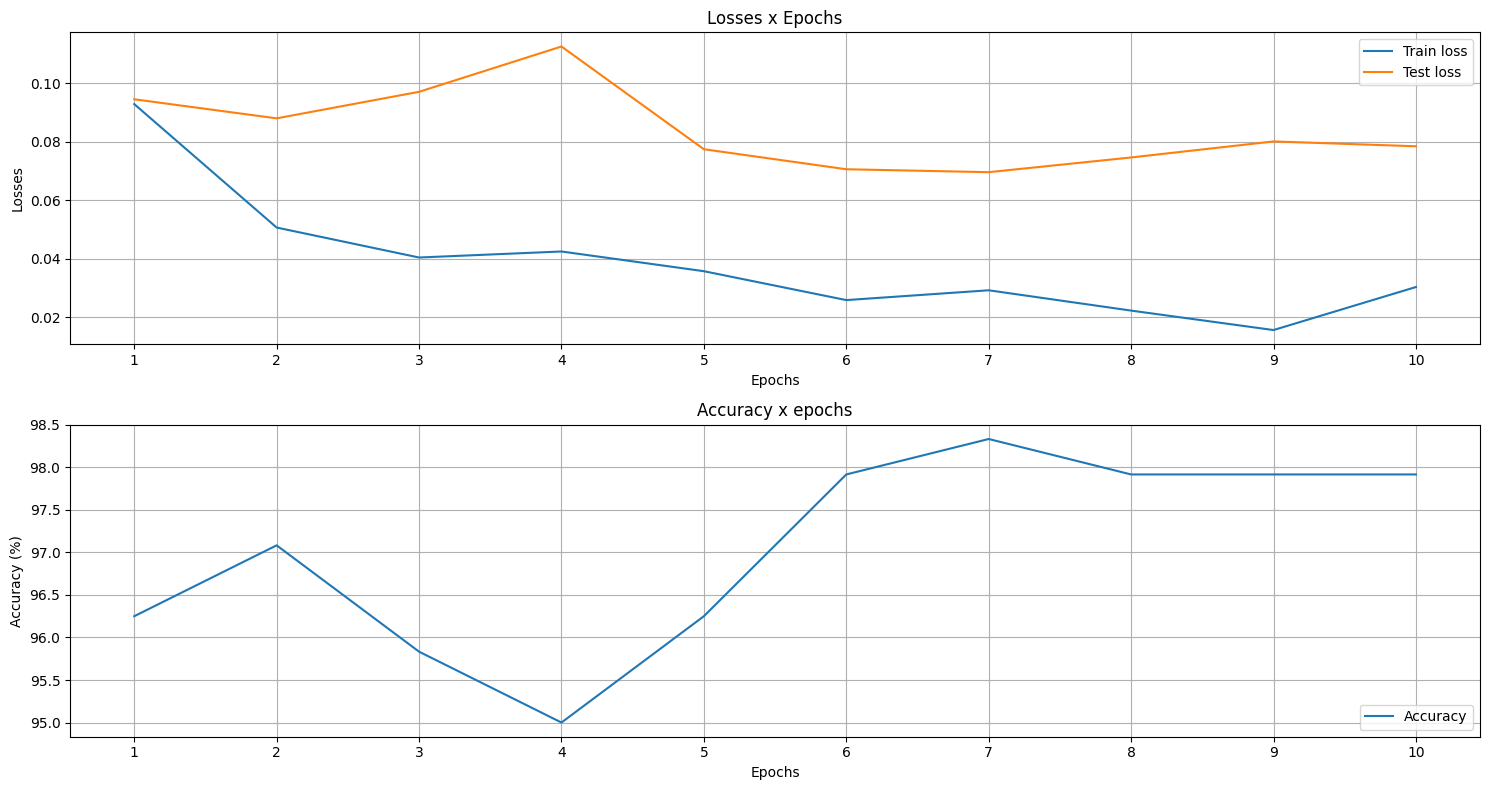

In [168]:
fig, axs = pyplot.subplots(2, figsize=(15,8))
axs[0].plot(range(1, epochs+1), list_train_loss,label="Train loss") #Plota o erro de treino X epocas
axs[0].plot(range(1, epochs+1), list_test_loss, label="Test loss") #Plota o erro de teste x epocas
axs[0].set(xticks=range(1, epochs+1))
axs[0].set_title('Losses x Epochs') #Define o título
axs[0].set(xlabel='Epochs') #Define o nome do eixo x
axs[0].set(ylabel='Losses') #Define o nome do eixo y
axs[0].legend() #Mostra a legenda
axs[0].grid(True) #Mostra a grade


axs[1].plot(range(1, epochs+1), list_acc, label='Accuracy') #Plota a acuracia para erro de 1 graus x epocas
axs[1].set(xticks=range(1, epochs+1))
axs[1].set_title('Accuracy x epochs') #Define o título
axs[1].set(xlabel='Epochs') #Define o nome do eixo x
axs[1].set(ylabel='Accuracy (%)') #Define o nome do eixo y
axs[1].legend(loc='lower right') #Mostra a legenda
axs[1].grid(True) #Mostra a grade

pyplot.tight_layout()

In [169]:
total = 0
correct = 0
loss_valid = 0

for imagem_valid, label_valid in loader_valid:

	loss_v = 0

	imagem_valid, label_valid = imagem_valid.float().to(device), label_valid.to(device)
	outputs_valid = model(imagem_valid)
	_, previsao = torch.max(outputs_valid, dim = 1)
	loss_v = criterion (outputs_valid, label_valid.long())
	total = total + 1 #Adiciona +1 na variável que guarda o total de previsões feitas
	if previsao == label_valid:
		correct = correct + 1 #Soma +1 na variável que mede quantas previsões dessa categoria (erro absoluto de 2 graus) estão certas
	loss_valid += loss_v

loss_valid = loss_valid/len(loader_valid)
accuracy = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem

print('A acurácia obtida foi de: {:.2f}'.format(accuracy) + '%.')
print()
print('O erro médio obtido foi de: {:.4f}'.format(loss_valid))
print()
print('O tempo gasto durante o treinamento, excluindo a primeira época, foi de: {:.2f}'.format(TIME), 'segundos.')
print()

if accuracy > 95.0 and TIME < 500:
	print('Os resultados obtidos foram satisfatórios. Parabéns!')
elif accuracy > 95.0 and TIME > 500:
	print('A acurácia apresentou um valor satisfatório, mas o tempo de treinamento não. Tente otimizar este parâmetro.')
elif accuracy < 95.0 and TIME < 500:
	print('O tempo de treinamento apresentou um valor satisfatório, mas a acurácia não. Tente otimizar este parâmetro.')
else:
	print('Os valores demandados não foram alcançados. Tente otimizá-los para validar a sua submissão.')

A acurácia obtida foi de: 96.27%.

O erro médio obtido foi de: 0.1160

O tempo gasto durante o treinamento, excluindo a primeira época, foi de: 248.79 segundos.

Os resultados obtidos foram satisfatórios. Parabéns!
